The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.



In [16]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np



In [17]:
nobel = pd.read_csv('data/nobel.csv')
print(nobel.head())

top_gender = nobel['sex'].value_counts().index[0]

top_country = nobel['birth_country'].value_counts().index[0]

   year    category  ... death_city death_country
0  1901   Chemistry  ...     Berlin       Germany
1  1901  Literature  ...   Châtenay        France
2  1901    Medicine  ...    Marburg       Germany
3  1901       Peace  ...     Heiden   Switzerland
4  1901       Peace  ...      Paris        France

[5 rows x 18 columns]


2000


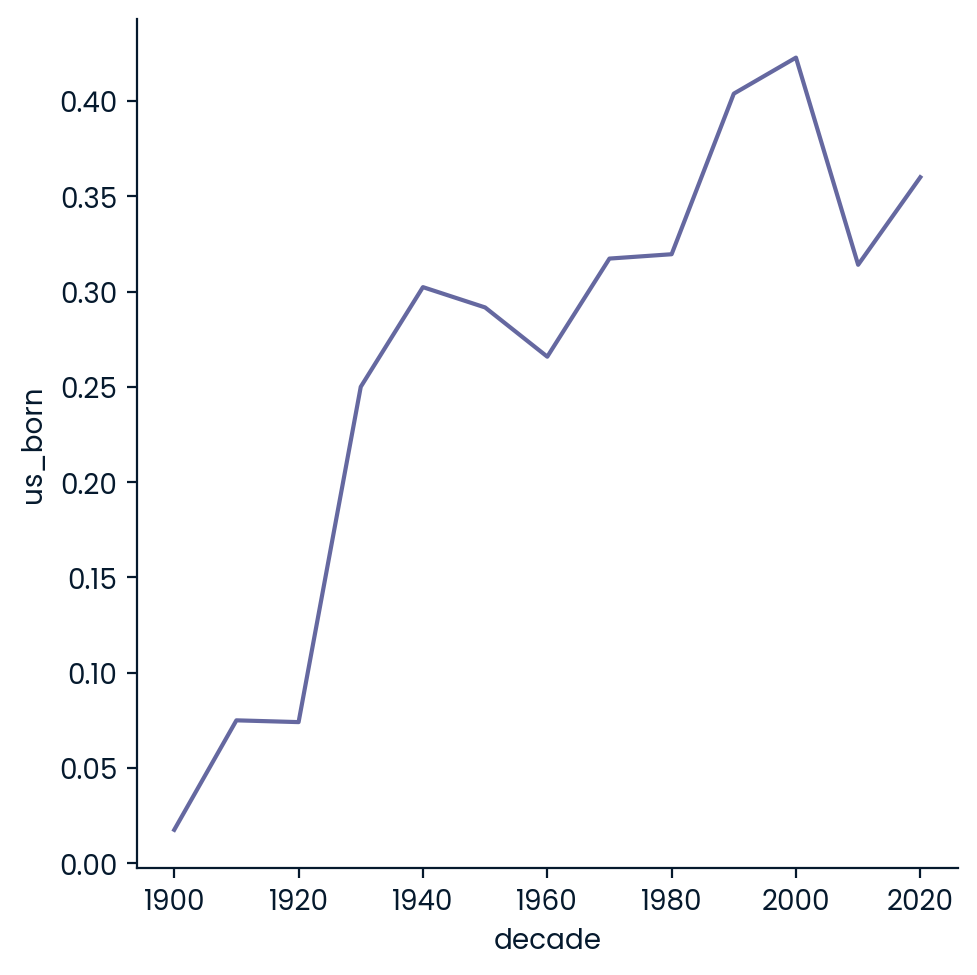

In [18]:
nobel['us_born'] = nobel['birth_country'] == 'United States of America'
nobel['decade'] = (nobel['year']//10)*10

decade_group = nobel.groupby('decade')
ratio = decade_group['us_born'].mean()
max_decade_usa = ratio.idxmax()
print(max_decade_usa)

ratio_df = ratio.reset_index()

sns.relplot(x='decade',y='us_born',data=ratio_df,kind='line',ci=None)

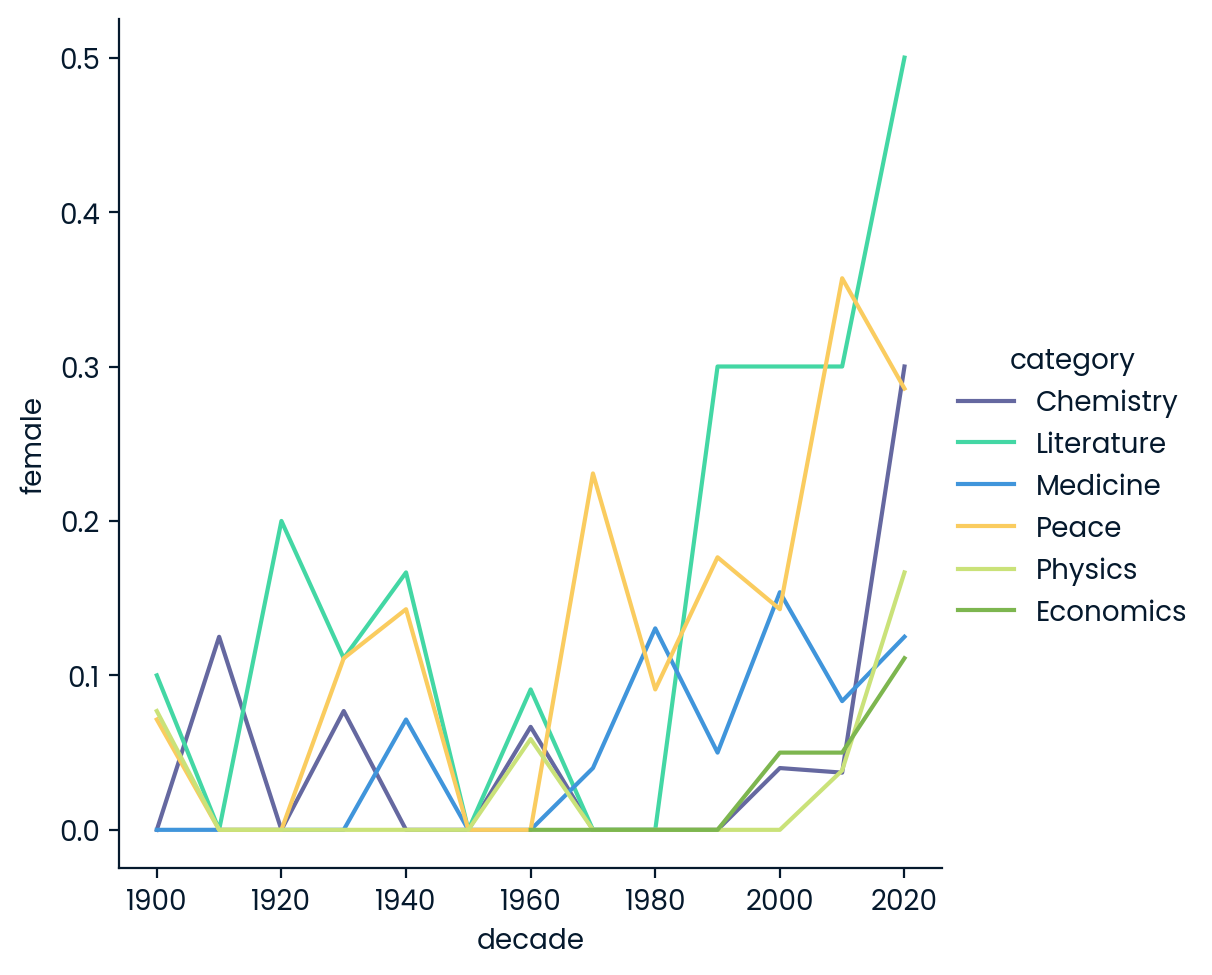

In [19]:
nobel['female'] = nobel['sex'] == 'Female'
female_group = nobel.groupby(['decade','category'], as_index = False)['female'].mean()

max_row = female_group.loc[female_group['female'].idxmax()]

max_female_dict = { int(max_row['decade']) : max_row['category'] }

sns.relplot(x='decade',y='female',data=female_group,kind='line',ci=None,hue='category')


In [20]:
female_winners = nobel[nobel['sex']=='Female']
first_year = female_winners['year'].min()

first_female = female_winners[female_winners['year']==first_year]

first_woman_name = first_female['full_name'].values[0]
first_woman_category = first_female['category'].values[0]

print(f'{first_woman_name} won in {first_woman_category}')

Marie Curie, née Sklodowska won in Physics


In [21]:
repeat_winners = nobel['full_name'].value_counts()
repeat_winners

repeat_list = list(repeat_winners[repeat_winners>=2].index)
repeat_list

['Comité international de la Croix Rouge (International Committee of the Red Cross)',
 'Linus Carl Pauling',
 'John Bardeen',
 'Frederick Sanger',
 'Marie Curie, née Sklodowska',
 'Office of the United Nations High Commissioner for Refugees (UNHCR)']